# Data Preparation: Airbnb Listings

In [42]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [43]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('listings.csv', usecols=cols)

In [44]:
data.shape

(27392, 16)

In [45]:
data.head(50)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$160.00,3,21,62,86.0,1
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,$105.00,1,28,22,85.0,2
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$195.00,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,$165.00,2,11,16,96.0,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$80.00,1,29,0,NaN,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$120.00,2,5,0,NaN,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,$150.00,1,30,14,96.0,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,$40.00,4,0,10,94.0,4


In [46]:
len(data['zipcode'][data.zipcode.isnull()])

162

In [47]:
[data.zipcode.isnull()]

[0        False
 1         True
 2        False
 3        False
 4        False
 5        False
 6        False
 7        False
 8        False
 9        False
 10       False
 11       False
 12       False
 13       False
 14       False
 15       False
 16       False
 17       False
 18       False
 19       False
 20       False
 21       False
 22       False
 23       False
 24       False
 25       False
 26       False
 27       False
 28       False
 29       False
          ...  
 27362    False
 27363    False
 27364    False
 27365    False
 27366    False
 27367    False
 27368    False
 27369    False
 27370    False
 27371    False
 27372    False
 27373    False
 27374    False
 27375    False
 27376    False
 27377    False
 27378    False
 27379    False
 27380    False
 27381    False
 27382    False
 27383    False
 27384    False
 27385    False
 27386    False
 27387    False
 27388    False
 27389    False
 27390    False
 27391    False
 Name: zipcode, Length: 

In [48]:
# check the number of missing values in each individua column
for col in data.columns:
    print (col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
zipcode, Number of Missing Values: 162
property_type, Number of Missing Values: 6
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 463
bedrooms, Number of Missing Values: 140
beds, Number of Missing Values: 98
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 8657
host_listing_count, Number of Missing Values: 0


### 1. Remove NaN values from dataframe except review_scores_rating

In [49]:
original = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Number of NaN values removed:', original - len(data))

Number of NaN values removed: 769


### 2. Convert formatting for price from $1.00 into a float of 1.00

In [50]:
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

In [51]:
data

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1,29,0,NaN,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2,5,0,NaN,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1,30,14,96.0,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4,0,10,94.0,4
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1,2,0,NaN,1


### 3. Drop any invalid values

In [52]:
print ('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(data[data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]  # filter out values == 0
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

Number of Accommodates 0: 0
Number of Bedrooms 0: 2321
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


In [53]:
data.shape

(24302, 16)

### 4. Convert Zipcode to 5 digits

In [12]:
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')

In [13]:
data.head(100)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1,29,0,NaN,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2,5,0,NaN,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1,30,14,96.0,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4,0,10,94.0,4
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1,2,0,NaN,1


### 5.  Let's explore distribution of accommodates

In [14]:
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))

Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [15]:
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

Accommodation 1: 2643
Accommodation 2: 11400
Accommodation 3: 2909
Accommodation 4: 4278
Accommodation 5: 982
Accommodation 6: 1214
Accommodation 7: 217
Accommodation 8: 333
Accommodation 9: 57
Accommodation 10: 119
Accommodation 11: 15
Accommodation 12: 43
Accommodation 13: 4
Accommodation 14: 14
Accommodation 15: 5
Accommodation 16: 69


In [16]:
data.groupby('accommodates')['id'].agg('count')

accommodates
1      2643
2     11400
3      2909
4      4278
5       982
6      1214
7       217
8       333
9        57
10      119
11       15
12       43
13        4
14       14
15        5
16       69
Name: id, dtype: int64

### 6. Visualize distribution of price, accommdations, beds, and review_scores_rating respectively

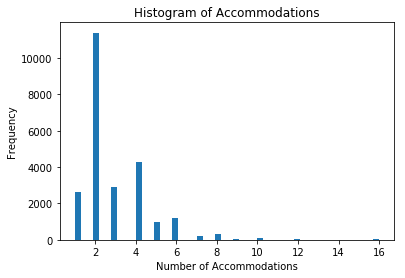

In [17]:
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

We see that a majority of listings have accomodations for 1-4 people. 1 bed typically accomodates 2 individuals, so let's plot beds instead to analyze how many of the listings are single bedroom listings.

In [18]:
# explore distribution of beds

print('Number of Unique Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(data[data['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16.]
Beds 1: 16002
Beds 2: 5418
Beds 3: 1770
Beds 4: 610
Beds 5: 243
Beds 6: 117
Beds 7: 41
Beds 8: 22
Beds 9: 3
Beds 10: 20
Beds 11: 4
Beds 12: 9
Beds 13: 1
Beds 14: 15
Beds 15: 0
Beds 16: 27


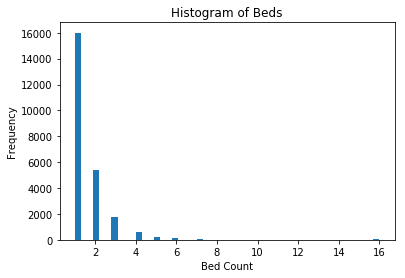

In [19]:
# Visualize the distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

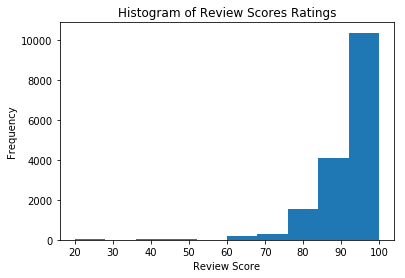

In [20]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

### 7. Convert NaN scores with 0 reviews into 'No Reviews'

In [21]:
print('Number of missing review scores ratings:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Number of missing review scores ratings: 7712


In [22]:
# data['review_scores_rating'] = np.where(data['number_of_reviews'] == 0, 'No Reviews', data['review_scores_rating'])
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, 'review_scores_rating'] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')

In [ ]:
# df['review_scores_rating'][df['number_of_reviews'] == 0].index.values.tolist() == df[df['number_of_reviews'] == 0].index.values.tolist()

In [23]:
data.head(100)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1,29,0,No Reviews,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2,5,0,No Reviews,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1,30,14,96,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4,0,10,94,4
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1,2,0,No Reviews,1


In [24]:
# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

In [25]:
len(data)

24053

# 8. Convert review_scores_rating into 13 buckets

In [26]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

In [27]:
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100' 'No Reviews']


In [28]:
data.head(100)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,85-89,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,95-100,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,95-100,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,95-100,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,95-100,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1,29,0,No Reviews,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2,5,0,No Reviews,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1,30,14,95-100,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4,0,10,90-94,4
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1,2,0,No Reviews,1


In [29]:
print('Number of remaining records:', len(data))


Number of remaining records: 24053


### 9. Encode categorical variables

In [30]:
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])
review_dummies = pd.get_dummies(data['review_scores_rating'])

In [31]:
review_dummies

,20-29,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,No Reviews
0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,1


### 10. Replace the old columns with our new one-hot encoded ones

In [32]:
df = pd.concat((data.drop(['property_type', 'room_type', 'bed_type', 'review_scores_rating'], axis=1), \
     property_dummies.astype(int), room_dummies.astype(int), bed_dummies.astype(int), review_dummies), \
     axis=1)

print('Number of Columns:', len(df.columns))

Number of Columns: 49


In [33]:
df

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,...,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,No Reviews
0,1069266,5867023,10022,2,1.0,1.0,1.0,160.0,3,21,...,0,0,0,0,0,0,1,0,0,0
2,2061725,4601412,11221,2,1.0,1.0,2.0,58.0,3,4,...,0,0,0,0,0,0,0,0,1,0
3,44974,198425,10011,2,1.0,1.0,1.0,185.0,10,1,...,0,0,0,0,0,0,0,0,1,0
4,4701675,22590025,10011,2,1.0,1.0,2.0,195.0,1,30,...,0,0,0,0,0,0,0,0,1,0
5,68914,343302,11231,6,1.0,2.0,3.0,165.0,2,11,...,0,0,0,0,0,0,0,0,1,0
6,4832596,4148973,11207,2,1.0,1.0,1.0,80.0,1,29,...,0,0,0,0,0,0,0,0,0,1
7,2562510,13119459,10013,2,1.0,1.0,1.0,120.0,2,5,...,0,0,0,0,0,0,0,0,0,1
8,3005360,4421803,10003,4,1.0,2.0,2.0,150.0,1,30,...,0,0,0,0,0,0,0,0,1,0
9,2431607,4973668,11221,2,1.0,1.0,1.0,40.0,4,0,...,0,0,0,0,0,0,0,1,0,0
11,4833061,24879430,11221,2,1.0,1.0,1.0,75.0,1,2,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df.columns

Index(['id', 'host_id', 'zipcode', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'minimum_nights', 'availability_30', 'number_of_reviews',
       'host_listing_count', 'Apartment', 'Bed & Breakfast', 'Boat', 'Cabin',
       'Camper/RV', 'Castle', 'Cave', 'Chalet', 'Dorm', 'Earth House', 'House',
       'Hut', 'Lighthouse', 'Loft', 'Other', 'Tent', 'Treehouse', 'Villa',
       'Entire home/apt', 'Private room', 'Shared room', 'Airbed', 'Couch',
       'Futon', 'Pull-out Sofa', 'Real Bed', '20-29', '30-39', '40-49',
       '50-59', '60-69', '70-79', '80-84', '85-89', '90-94', '95-100',
       'No Reviews', 'price', 'price_log'],
      dtype='object')

### 11. Move target predictor 'price' to the end of the dataframe

In [34]:
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]
df

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,No Reviews,price
0,1069266,5867023,10022,2,1.0,1.0,1.0,3,21,62,...,0,0,0,0,0,1,0,0,0,160.0
2,2061725,4601412,11221,2,1.0,1.0,2.0,3,4,35,...,0,0,0,0,0,0,0,1,0,58.0
3,44974,198425,10011,2,1.0,1.0,1.0,10,1,26,...,0,0,0,0,0,0,0,1,0,185.0
4,4701675,22590025,10011,2,1.0,1.0,2.0,1,30,1,...,0,0,0,0,0,0,0,1,0,195.0
5,68914,343302,11231,6,1.0,2.0,3.0,2,11,16,...,0,0,0,0,0,0,0,1,0,165.0
6,4832596,4148973,11207,2,1.0,1.0,1.0,1,29,0,...,0,0,0,0,0,0,0,0,1,80.0
7,2562510,13119459,10013,2,1.0,1.0,1.0,2,5,0,...,0,0,0,0,0,0,0,0,1,120.0
8,3005360,4421803,10003,4,1.0,2.0,2.0,1,30,14,...,0,0,0,0,0,0,0,1,0,150.0
9,2431607,4973668,11221,2,1.0,1.0,1.0,4,0,10,...,0,0,0,0,0,0,1,0,0,40.0
11,4833061,24879430,11221,2,1.0,1.0,1.0,1,2,0,...,0,0,0,0,0,0,0,0,1,75.0


### 12. Convert numeric variables to floats and normalize

In [35]:
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = normalize(df[col])

In [36]:
df.head()

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,No Reviews,price
0,1069266,5867023,10022,-0.520256,-0.331519,-0.407440,-0.493059,0.173446,0.390321,2.716276,...,0,0,0,0,0,1,0,0,0,160.0
2,2061725,4601412,11221,-0.520256,-0.331519,-0.407440,0.381668,0.173446,-0.965980,1.295702,...,0,0,0,0,0,0,0,1,0,58.0
3,44974,198425,10011,-0.520256,-0.331519,-0.407440,-0.493059,2.885991,-1.205327,0.822177,...,0,0,0,0,0,0,0,1,0,185.0
4,4701675,22590025,10011,-0.520256,-0.331519,-0.407440,0.381668,-0.601567,1.108363,-0.493170,...,0,0,0,0,0,0,0,1,0,195.0
5,68914,343302,11231,1.690843,-0.331519,1.266082,1.256396,-0.214061,-0.407503,0.296038,...,0,0,0,0,0,0,0,1,0,165.0


Text(0, 0.5, 'Frequency')

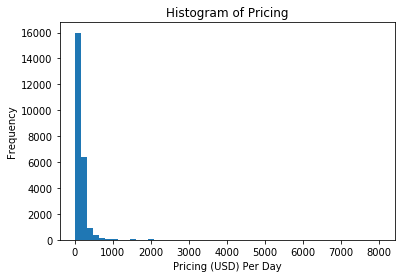

In [37]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
# plt.show()

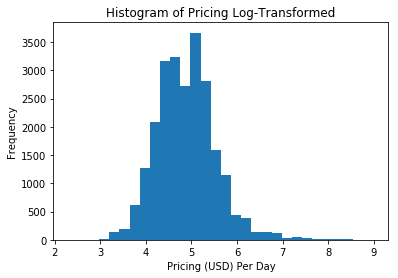

In [38]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [39]:
# read to csv
df.to_csv('output.csv')